- show distribution of classes -- bar chart
- most common characters, words; and distribution across different languages
- correlation matrixes (subsets..)
- show: comparision of different formats/languages
- show outliers (?)

- analyze TF-IDF, BoW

- Validation & analysis
    - Confusion matrixes
    - Graphs of parameter tuning, e.g. NN layers/nodes vs accuracy
    - K-cross validation
    - comparing performance of models for both TF-IDF and BoW

- Notes:
    -SVM takes a really long time for large dataset -- ~1million rows
    -seems to get perfect accuracy for SVM, etc -- too easy?
    -works fine with smaller number of dimensions


In [29]:
from preprocess import get_df_from_db 

import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
df = pd.read_csv('./data/cleaned_df_1000rows_100features.csv')

Use bar graph to show class distribution of programming language/text format snippets

In [31]:
language_value_counts = df['language'].value_counts()

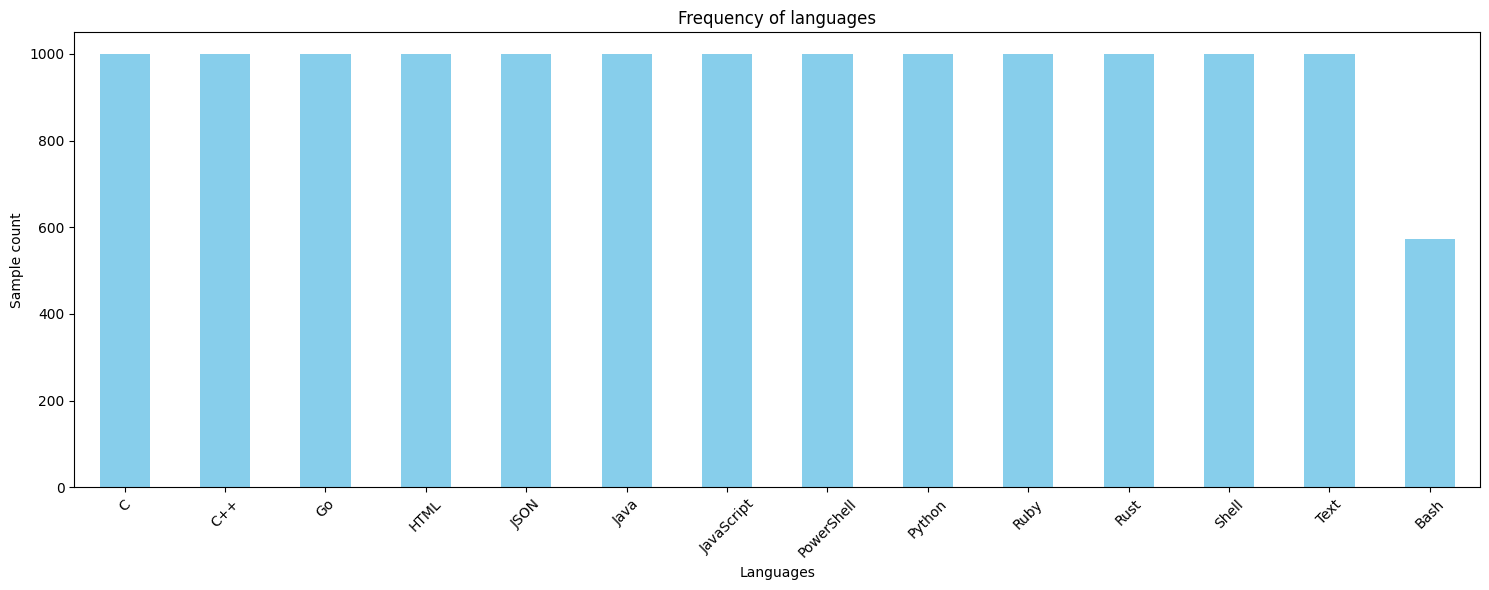

In [32]:

# Plotting a bar graph
plt.figure(figsize=(15, 6))
language_value_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of languages')
plt.xlabel('Languages')
plt.ylabel('Sample count')
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [33]:
language_value_counts

language
C             1000
C++           1000
Go            1000
HTML          1000
JSON          1000
Java          1000
JavaScript    1000
PowerShell    1000
Python        1000
Ruby          1000
Rust          1000
Shell         1000
Text          1000
Bash           574
Name: count, dtype: int64

In [34]:
languages = language_value_counts.keys()

{'Bash': 128.9111111111111, 'C': 133.675704989154, 'C++': 144.89456869009584, 'Go': 118.1029106029106, 'HTML': 182.23809523809524, 'JSON': 132.00500500500502, 'Java': 157.68812877263582, 'JavaScript': 137.27319062181448, 'PowerShell': 145.72689938398358, 'Python': 135.74591836734695, 'Ruby': 126.33508403361344, 'Rust': 116.68736616702355, 'Shell': 130.58954393770856, 'Text': 123.41971544715447}


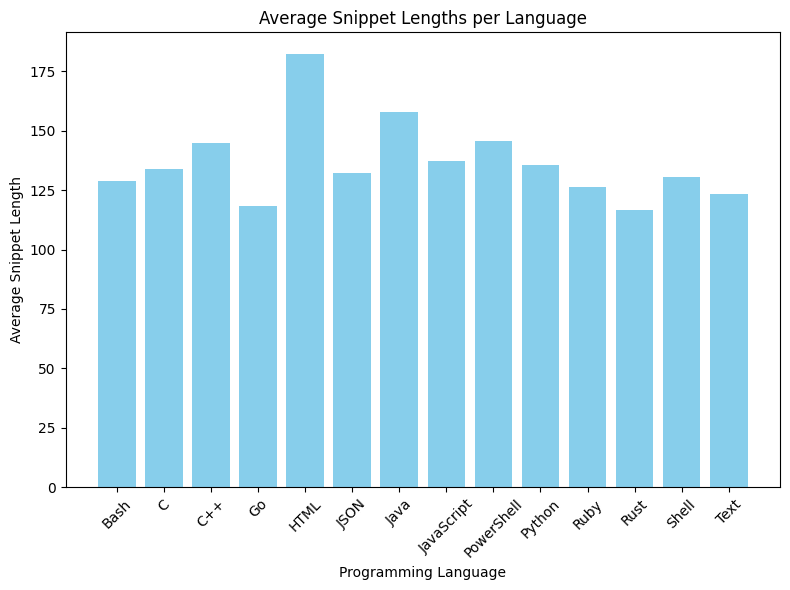

In [35]:
avg_snippet_lengths = df.groupby('language')['snippet'].apply(lambda x: x.str.len().mean()).to_dict()

print(avg_snippet_lengths)

plt.figure(figsize=(8, 6))
plt.bar(avg_snippet_lengths.keys(), avg_snippet_lengths.values(), color='skyblue')
plt.xlabel('Programming Language')
plt.ylabel('Average Snippet Length')
plt.title('Average Snippet Lengths per Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
dict(sorted(avg_snippet_lengths.items(), key = lambda x: x[1], reverse=True))

print(f'total classes: {len(avg_snippet_lengths.items())}')

total classes: 14


### Viewing a snippet for all 46 languages

In [37]:

for language in languages:
    print(f'Language: {language}:\n')
    for i in range(0, 1):
        print(f'Snippet {i}:')
        print(df[df['language'] == language].iloc[i]['snippet'])
        print("\n")

Language: C:

Snippet 0:
* * Returns 'NoMatchingDocument ' error code document 'migrationUUID ' found . * / StatusWith < TenantMigrationRecipientDocument > getStateDoc ( OperationContext * opCtx , const UUID & migrationUUID ) ;


Language: C++:

Snippet 0:
assertAutoCString ( json_as_string ( json_at ( test , 2 ) ) , JSON_TEXT ( `` Mars '' ) ) ; assertAutoCString ( json_as_string ( json_at ( test , 3 ) ) , JSON_TEXT ( `` Pluto '' ) ) ; assertAutoCString ( json_as_string ( json_at ( test , 4 ) ) , JSON_TEXT ( `` Earth '' ) ) ; assertAutoCString ( json_as_string ( json_at ( test , 5 ) ) , JSON_TEXT ( `` Jude '' ) ) ; assertAutoCString ( json_as_string ( * ti ) , JSON_TEXT ( `` Pluto '' ) ) ;


Language: Go:

Snippet 0:
ForceSendFields [ ] string ` json : '' - '' `


Language: HTML:

Snippet 0:
< /tr > < tr > < td > assertErrorOnNext < /td > < td > Error executing strategy function bar * < /td > < td > & nbsp ; < /td >


Language: JSON:

Snippet 0:
474 , 451 , 492 , 458 , 493 ,


Language

#### Grouping similar languages
    - TSV, DOTFILE, CSV, Jupyter, YAML, HTML, Markdown, Text
    - Python, JSON, JavaScript, C++, Java, Go, C, Ruby, Rust, Shell, PowerShell, Bash

#### Comparing C and C++

In [38]:
for language in ['C', 'C++']:
    print(f'Language: {language}:\n')
    for i in range(0, 4):
        print(f'Snippet {i}:')
        print(df[df['language'] == language].iloc[i]['snippet'])
        print("\n")

Language: C:

Snippet 0:
* * Returns 'NoMatchingDocument ' error code document 'migrationUUID ' found . * / StatusWith < TenantMigrationRecipientDocument > getStateDoc ( OperationContext * opCtx , const UUID & migrationUUID ) ;


Snippet 1:
114,105,112,116,58,45,45,62,13,10,60,115,99,114,105,112,116,32,116,121,112,101 , 61,34,116,60,97,32,104,114,101,102,61,39,104,116,116,112,58,47,47,119,119,119,46 ,104,111,114,116,99,117,116,32,105,99,111,110,34,32,104,114,101,102,61,34,60,47 , 100,105,118,62,13,10,60,100,105,118,32,99,108,97,115,115,61,34,60,115,99,114,105 ,112,116,32,115,114,99,61,34,104,116,116,112,58,47,47,34,32,114,101,108,61,34 ,


Snippet 2:
return block_type ; lzx- > block_type = block_type ; default_len = lzx_getbits ( lzx , 1 ) ;


Snippet 3:
free_io_pgtable_ops ( & domain- > iop.iop.ops ) ; spin_unlock_irqrestore ( & domain- > lock , flags ) ; } EXPORT_SYMBOL ( amd_iommu_domain_direct_map ) ;


Language: C++:

Snippet 0:
assertAutoCString ( json_as_string ( json_at ( test 

#### Comparing Python and Ruby

In [39]:
for language in ['Python', 'Ruby']:
    print(f'Language: {language}:\n')
    for i in range(0, 1):
        print(f'Snippet {i}:')
        print(df[df['language'] == language].iloc[i]['snippet'])
        print("\n")

Language: Python:

Snippet 0:
lrate , shrink_info_str ) ) train_lib.common.train_one_iteration ( dir=args.dir , iter=iter ,


Language: Ruby:

Snippet 0:
end describe ' let ( : user ) { create ( : user ) } let ( : files )




#### Comparing lisp and clojure

In [40]:
tfidf_chars = pd.read_csv('./data/tfidf_special_chars_100features_10000rows.csv')

In [41]:
tfidf_chars.head(10)

,Unnamed: 0,!,#,$,%,&,',(,),*,...,[,\,],^,`,{,|,},~,___LANGUAGE___
0,0,0.000000,0.0,0.590335,0.0,0.000000,0.000000,0.277903,0.277581,0.00000,...,0.000000,0.0,0.000000,0.0,0.000000,0.323075,0.000000,0.000000,0.0,Bash
1,1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,Bash
2,2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.000000,0.072600,0.000000,0.075118,0.0,Bash
3,3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,Bash
4,4,0.148022,0.0,0.293737,0.0,0.000000,0.308699,0.069139,0.069059,0.00000,...,0.354929,0.0,0.357222,0.0,0.364855,0.000000,0.000000,0.000000,0.0,Bash
5,5,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,Bash
6,6,0.000000,0.0,0.417285,0.0,0.316705,0.350833,0.039288,0.039242,0.00000,...,0.403372,0.0,0.405978,0.0,0.414653,0.182695,0.000000,0.189030,0.0,Bash
7,7,0.000000,0.0,0.600517,0.0,0.000000,0.000000,0.376929,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.497275,0.109549,0.225199,0.000000,0.0,Bash
8,8,0.000000,0.0,0.600275,0.0,0.000000,0.360487,0.161476,0.161288,0.15061,...,0.276315,0.0,0.139050,0.0,0.426064,0.140792,0.000000,0.097116,0.0,Bash
9,9,0.000000,0.0,0.325743,0.0,0.000000,0.479270,0.061338,0.000000,0.00000,...,0.419843,0.0,0.316916,0.0,0.485533,0.142616,0.293175,0.147562,0.0,Bash


In [42]:
def plot_corr_matrix(df, title):
    df = df.select_dtypes(include='number')

    corr_matrix = df.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.xlabel('Variables')
    plt.ylabel('Variables')
    plt.show()

['Unnamed: 0', '!', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '`', '{', '|', '}', '~', '___LANGUAGE___']


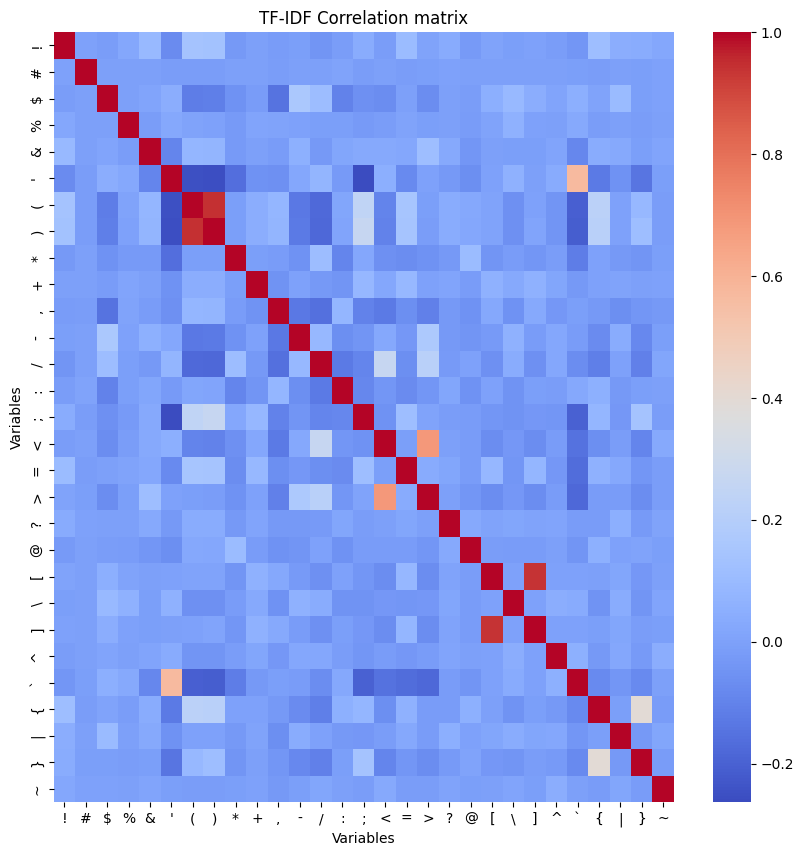

In [43]:
print(tfidf_chars.columns.tolist())
tfidf_chars = tfidf_chars.drop(['Unnamed: 0'], axis=1)
plot_corr_matrix(tfidf_chars, 'TF-IDF Correlation matrix')

In [44]:
bow_df = pd.read_csv('./data/bow_100features_1000rows.csv')

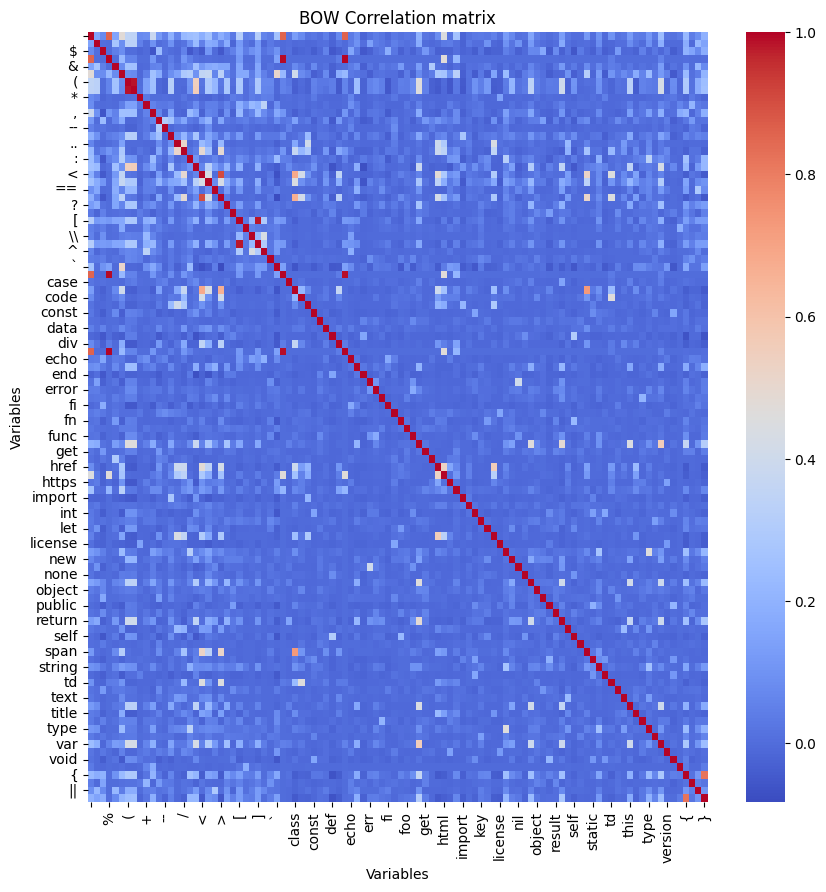

In [55]:
plot_corr_matrix(bow_df.drop(['Unnamed: 0'], axis=1), 'BOW Correlation matrix')

In [46]:
tfidf = pd.read_csv('./data/tfidf_100features_1000rows.csv')

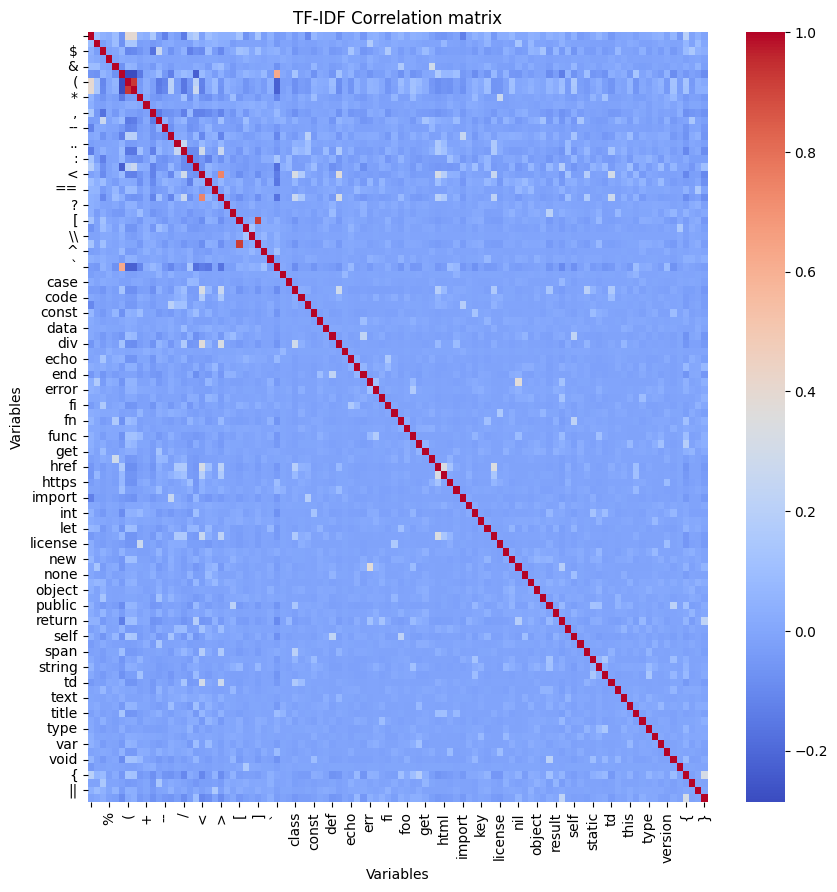

In [54]:
plot_corr_matrix(tfidf.drop(['Unnamed: 0'], axis=1), 'TF-IDF Correlation matrix')

array([[<Axes: title={'center': ' '}>, <Axes: title={'center': '!'}>,
        <Axes: title={'center': '$'}>, <Axes: title={'center': '%'}>,
        <Axes: title={'center': '&'}>, <Axes: title={'center': "'"}>,
        <Axes: title={'center': '('}>, <Axes: title={'center': ')'}>,
        <Axes: title={'center': '*'}>, <Axes: title={'center': '+'}>],
       [<Axes: title={'center': ','}>, <Axes: title={'center': '-'}>,
        <Axes: title={'center': '--'}>, <Axes: title={'center': '.'}>,
        <Axes: title={'center': '..'}>, <Axes: title={'center': '/'}>,
        <Axes: title={'center': ':'}>, <Axes: title={'center': ';'}>,
        <Axes: title={'center': '<'}>, <Axes: title={'center': '='}>],
       [<Axes: title={'center': '=='}>, <Axes: title={'center': '>'}>,
        <Axes: title={'center': '?'}>, <Axes: title={'center': '@'}>,
        <Axes: title={'center': '['}>, <Axes: title={'center': '\\'}>,
        <Axes: title={'center': '\\\\'}>, <Axes: title={'center': ']'}>,
        <Ax

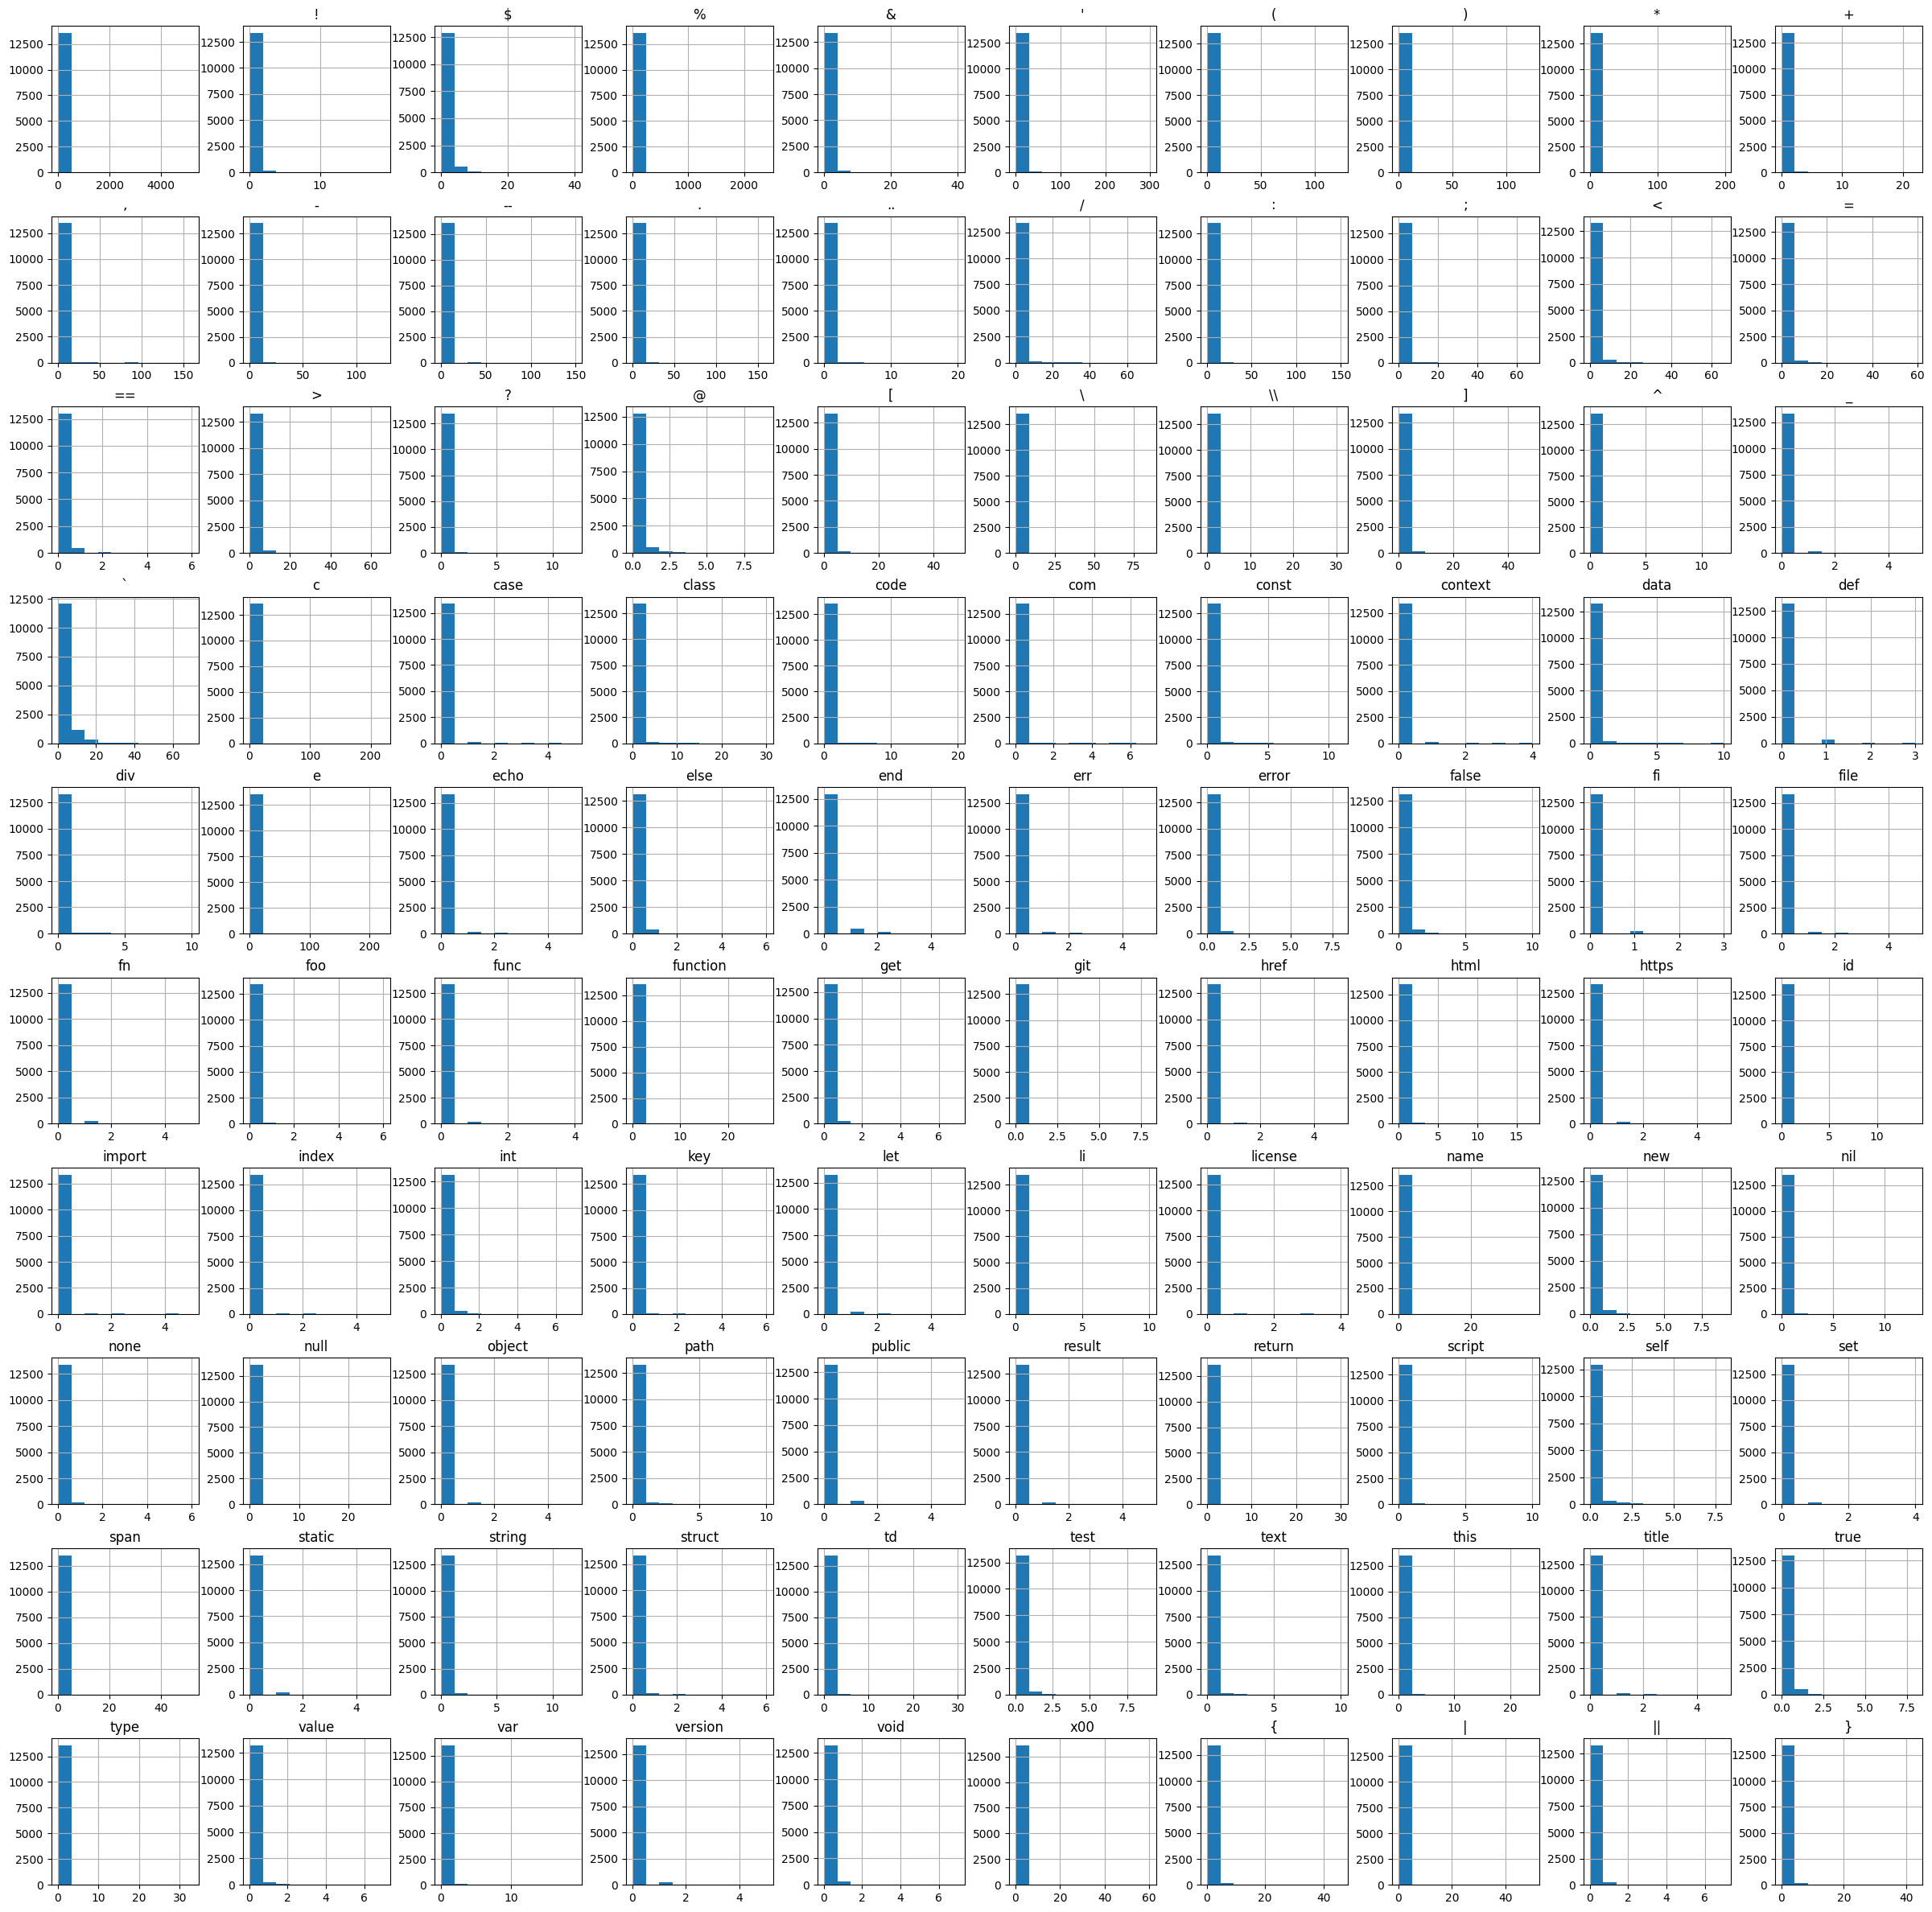

In [57]:
bow_df.drop(['Unnamed: 0'], axis=1).hist(figsize = (30,30))


array([[<Axes: title={'center': ' '}>, <Axes: title={'center': '!'}>,
        <Axes: title={'center': '$'}>, <Axes: title={'center': '%'}>,
        <Axes: title={'center': '&'}>, <Axes: title={'center': "'"}>,
        <Axes: title={'center': '('}>, <Axes: title={'center': ')'}>,
        <Axes: title={'center': '*'}>, <Axes: title={'center': '+'}>],
       [<Axes: title={'center': ','}>, <Axes: title={'center': '-'}>,
        <Axes: title={'center': '--'}>, <Axes: title={'center': '.'}>,
        <Axes: title={'center': '..'}>, <Axes: title={'center': '/'}>,
        <Axes: title={'center': ':'}>, <Axes: title={'center': ';'}>,
        <Axes: title={'center': '<'}>, <Axes: title={'center': '='}>],
       [<Axes: title={'center': '=='}>, <Axes: title={'center': '>'}>,
        <Axes: title={'center': '?'}>, <Axes: title={'center': '@'}>,
        <Axes: title={'center': '['}>, <Axes: title={'center': '\\'}>,
        <Axes: title={'center': '\\\\'}>, <Axes: title={'center': ']'}>,
        <Ax

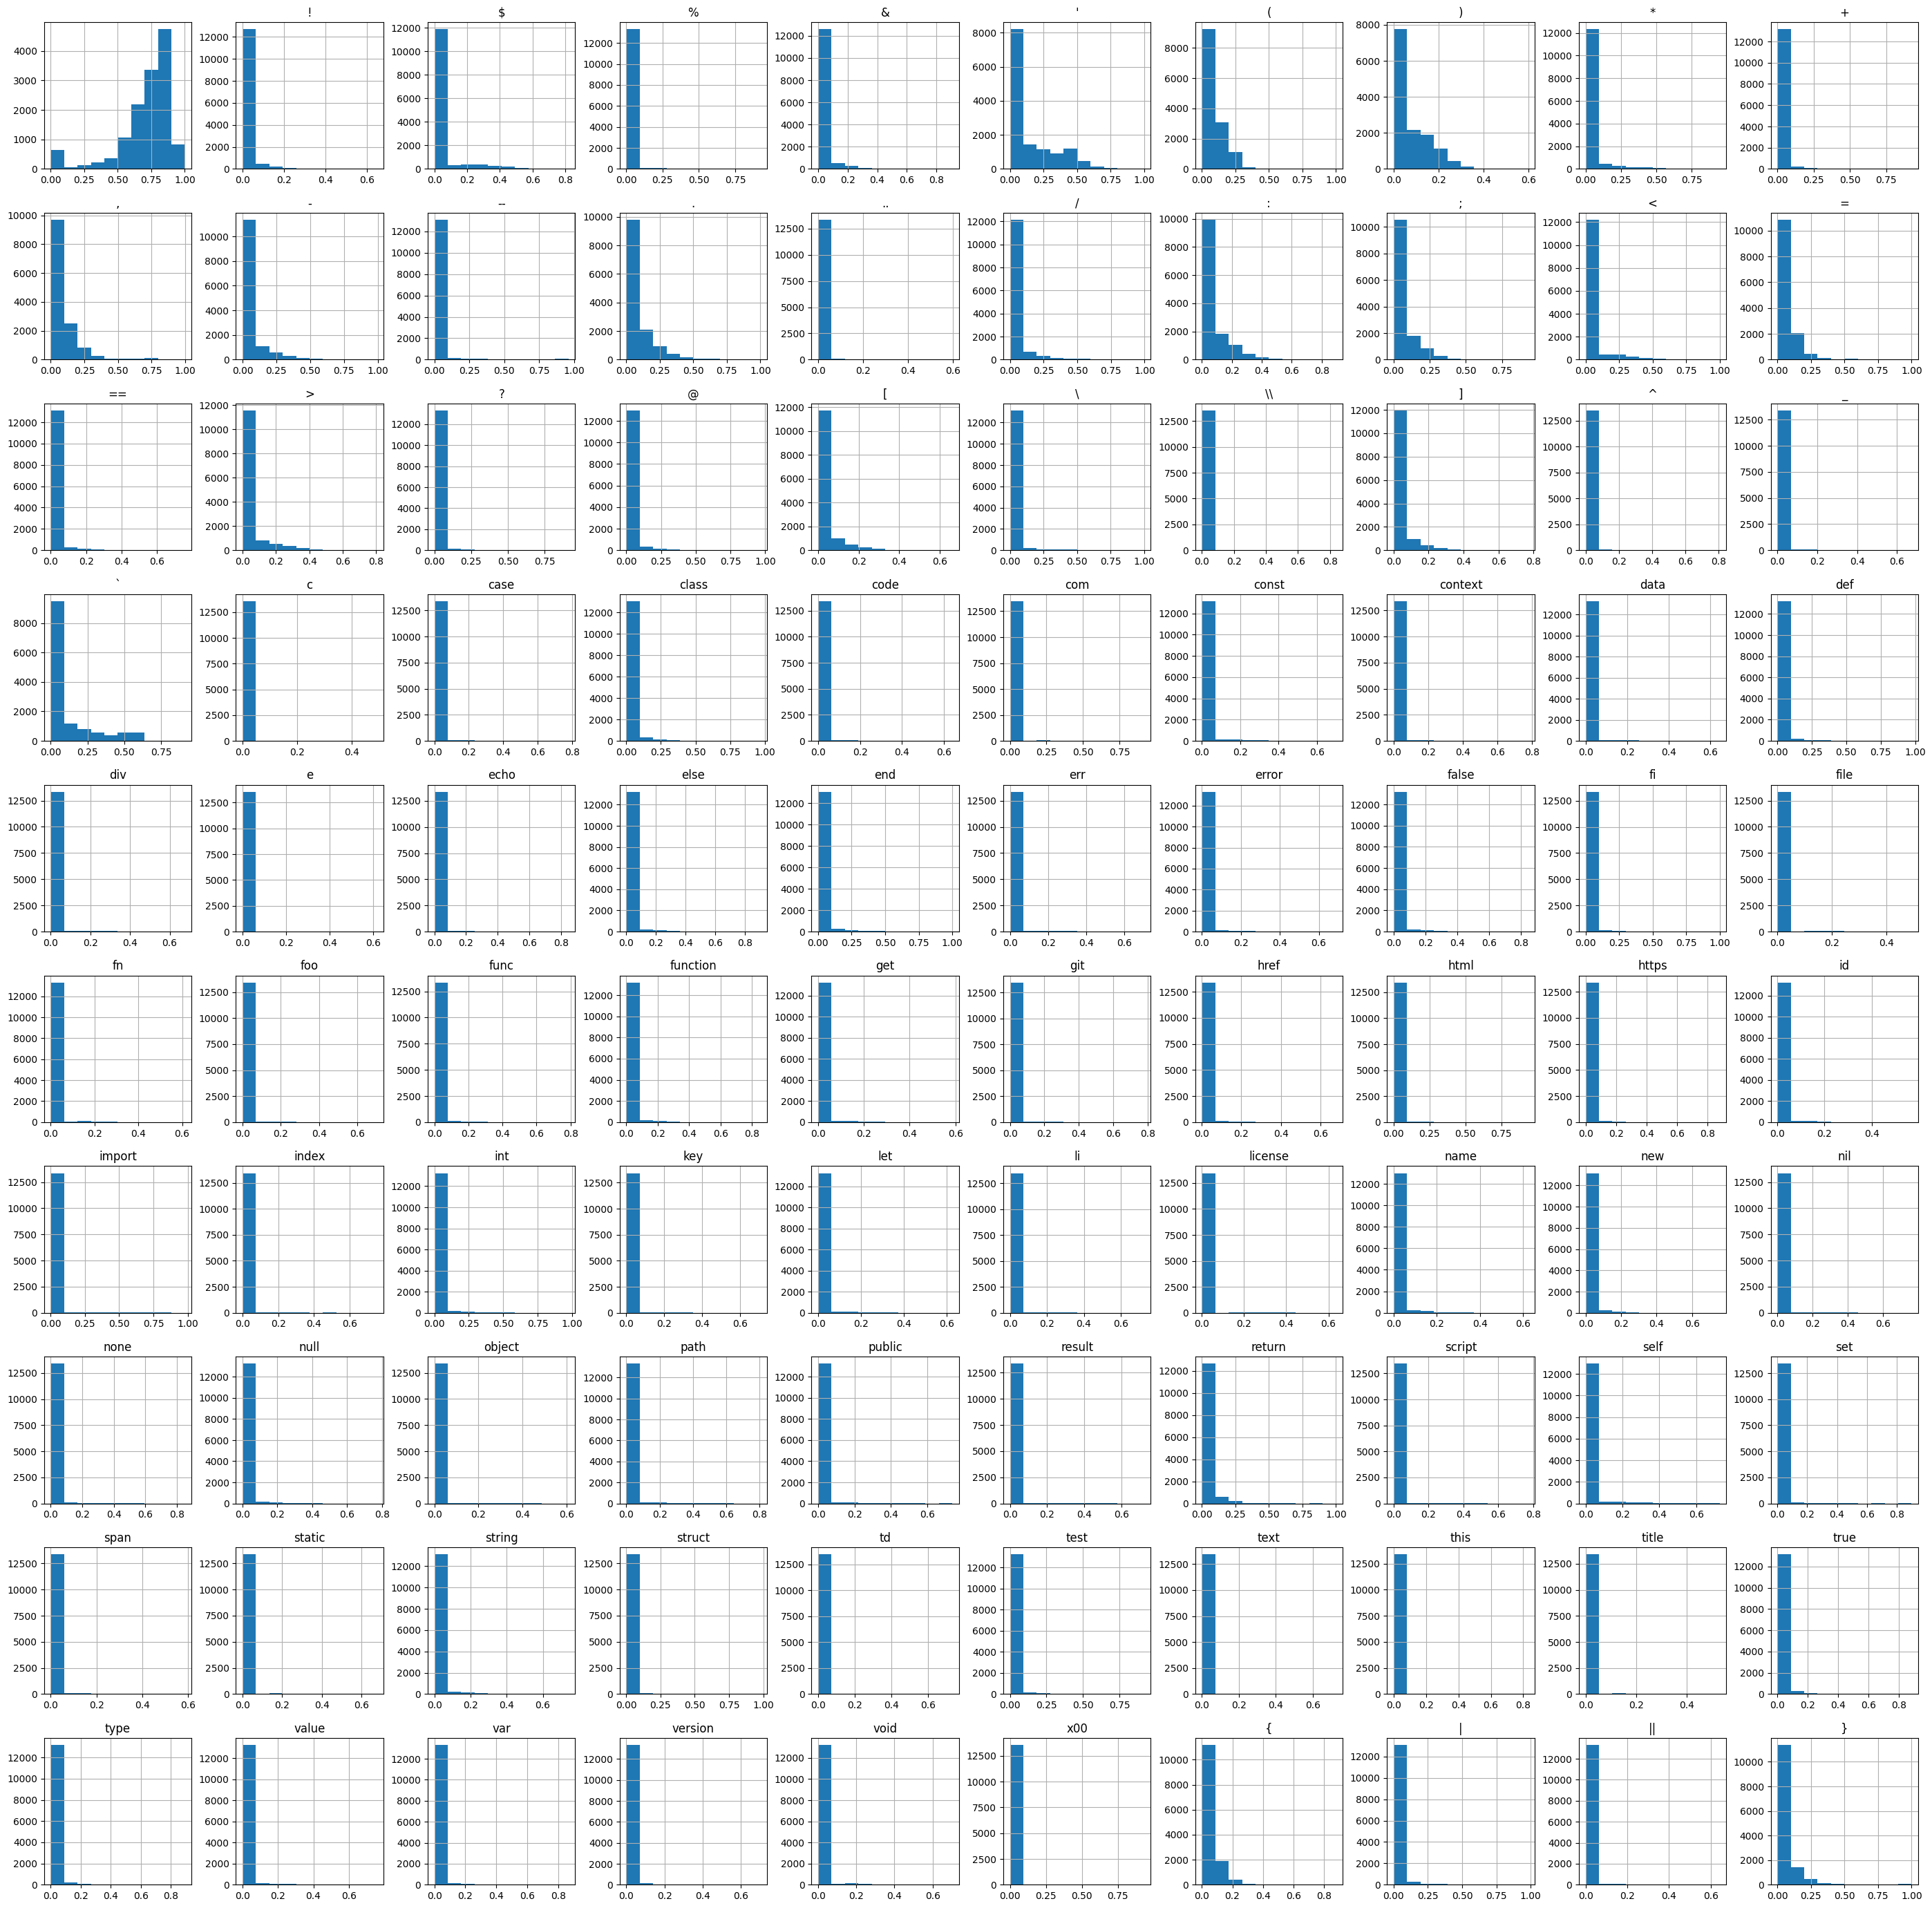

In [58]:
tfidf.drop(['Unnamed: 0'], axis=1).hist(figsize = (35,35))


### PCA with BoW

Explained Variance Ratios: [0.06547314077550873, 0.05099570065386104, 0.039064029460529524, 0.025783006508438247, 0.02345557818362629, 0.021303583018856705, 0.018776451665575518, 0.0180758906807008, 0.016786851764737352, 0.0163396819464517, 0.015460813111674267, 0.015076512185936627, 0.014842129534001184, 0.013840328440867041, 0.013475970103327994, 0.013347896509902169, 0.013132222163620966, 0.01265882832463976, 0.01234846026766709, 0.012169387039888558, 0.012100666614451434, 0.011942672956064842, 0.011689672257093645, 0.011630423613440686, 0.011434019343387503, 0.011151377699566018, 0.010964028183244484, 0.010938218134215338, 0.010671183754888635, 0.010648554968037198, 0.010525868801250652, 0.010287981908716676, 0.010165847942556221, 0.010132270954768359, 0.010080990139297027, 0.009979099847428157, 0.00992721406015467, 0.009782347091898702, 0.009748817412128971, 0.009512199705859052, 0.009472019764362313, 0.009398652131949525, 0.009352464658750888, 0.009234817260416318, 0.009137785127

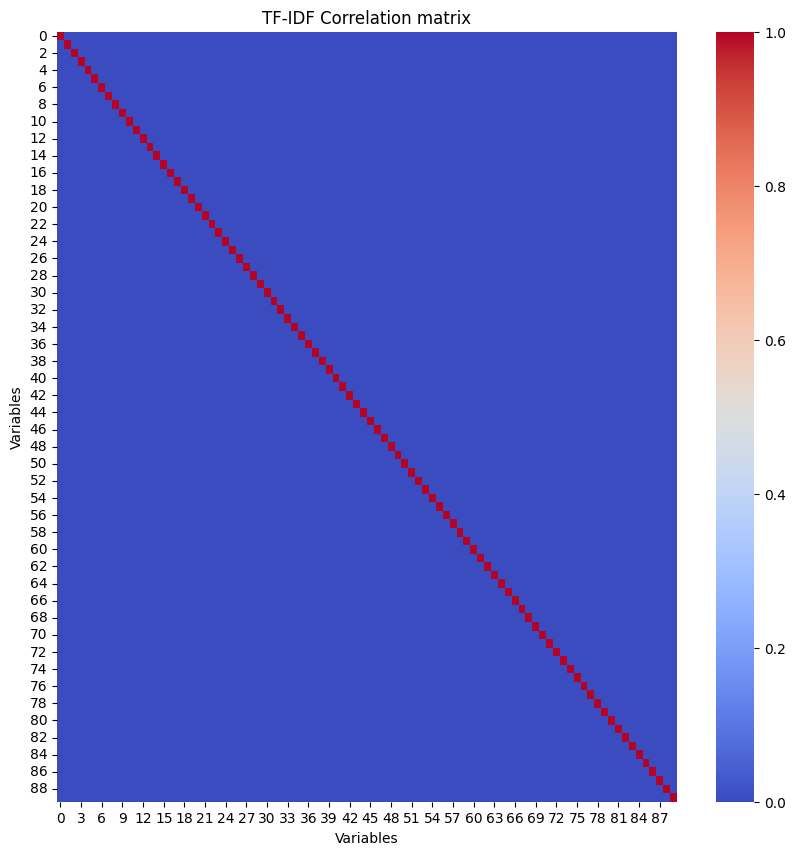

In [48]:


if '___LANGUAGE___' in bow_df.columns:
    language_df = bow_df['___LANGUAGE___']
    bow_df = bow_df.drop('___LANGUAGE___', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(bow_df)

pca = PCA(n_components=90)
X_pca = pca.fit_transform(X_scaled)

explained_variance = sorted(pca.explained_variance_ratio_, reverse=True)
print("Explained Variance Ratios:", explained_variance)
print("Total explained variance:", sum(explained_variance))

pca_bow = pd.DataFrame(X_pca)
pca_bow['___LANGUAGE___'] = language_df

# plot_corr_matrix(pca_bow, 'TF-IDF Correlation matrix')

# pca_bow.to_csv('./data/bow_pca_90features_1000rows.csv')

### PCA with TF-IDF

In [49]:

if '___LANGUAGE___' in tfidf.columns:
    language_df = tfidf['___LANGUAGE___']
    tfidf = tfidf.drop('___LANGUAGE___', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(tfidf)

pca = PCA(n_components=70)
X_pca = pca.fit_transform(X_scaled)

explained_variance = sorted(pca.explained_variance_ratio_, reverse=True)
print("Explained Variance Ratios:", explained_variance)
print("Total explained variance:", sum(explained_variance))

pca_tfidf = pd.DataFrame(X_pca)
pca_tfidf['___LANGUAGE___'] = language_df

# pca_tfidf.to_csv('./data/tfidf_pca_70features_1000rows.csv')

Explained Variance Ratios: [0.03629492531222211, 0.02866800202421372, 0.02096435814877074, 0.019525011307991297, 0.019148749268147823, 0.018105336309013013, 0.016869749436395857, 0.01572797903773724, 0.015090012811284978, 0.014666117407202132, 0.014146052319401508, 0.01382172766971146, 0.013512276598181376, 0.013254957591504126, 0.01275963432842581, 0.01237068457930899, 0.012294348578665843, 0.012115934586445803, 0.011858890362126088, 0.011730540762746242, 0.011579889590539696, 0.011456406816227763, 0.011252102374412246, 0.01119116280767206, 0.011085558264168101, 0.010861633358662248, 0.010807945383737255, 0.01075730554917169, 0.010666522443641815, 0.01056779683867952, 0.010505620117721891, 0.010453531172391969, 0.010356063558197877, 0.010274535641764268, 0.010265620072946981, 0.010213573058661376, 0.010040979976969691, 0.00999668820570443, 0.009938444745794209, 0.009916407668210293, 0.009873448518002523, 0.009802487712824267, 0.009688760724174914, 0.00967300068157685, 0.00960680022143

Todo:
- remove stop words ...
- remove the correllated variables from TF-IDF and BoW -- (e.g. <, >, }, {)
- Compare configurations: (BoW, TF-IDF, TF-IDF special chars, BoW special chars) 
    x (Non-PCA, PCA)
    x (1000 rows, 10000 rows)
    x (NB, SVM, DT, MLP)
    => 4 * 2 * 2 * 4 = 64 (minus 10-20)

- Preprocessing/data/Implementation:
    - data: length, source, format, classes, how I fetched it
    - preprocessing process
    - exploratory analysis
        - show distribution of classes
        - compare/contrast snippets between similar languages
        - distribution of average snippet lengths
        - correlation matrices for BoW, IT-DF
        - Show explained variance of PCA (scaling method for NB to work....)
        - Explain why not worry about outliers, and why don't need to scale
    - TF-IDF -- what it is, expected effect
    - BOW -- what it is, expected effect
    - SVM -- choosing kernel (linear); why chose to use it
    - MLP -- grid search, choosing neurons and layers; why chose to use it
    - DT -- grid search? (TODO); why chose it
    - NB = multinomial because good for NLP (?); why chose it -- simplest model
    - Training process

- Results analysis
    - graphs of select confusion matrices (TODO)
    - compare cross validation scores
    - graph of nodes/layers for MLP
    - how improved/got worse with PCA, 
    - compare BoW performance with TF-IDF performance
    - look at misclassified samples (TODO) and analyze why they are misclassified

- Conclusions
    - Configuration(s) that worked the best and why
    - why models performed better/worse than others
    - Future steps